# Neural Conformal Control for Time Series Forecasting
Before running this notebook, follow the instructions in README.md to get the necessary files.

In [1]:
from forecaster.utils import pickle_load
from forecaster.e2ecp import load_all_params
from forecaster.eval_cp import clip_index_prep, aggregrate_results_across_exps, get_preds
from forecaster.visualize_helper import prediction_intervals_plot, running_coverage_plot, cs_curve

/home/asuka/anaconda3/envs/forecaster/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
exp_id = 22051  # weather dataset
seed = 1
sort = True
methods = ['ncc', 'nexcp', 'cfrnn', 'aci', 'pid'] # our method is ncc

Generate the csv file with the evaluation metrics. The generated csv file is results/csvs/<exp_id>.csv.

In [3]:
e2ecp_params = load_all_params(exp_id)
all_base_preds = pickle_load(f'../../results/base_pred/saved_pred_{e2ecp_params["data_file_id"]}.pickle', version5=True)
base_pred_ds = all_base_preds['params']['dataset']
clip_idx_list = clip_index_prep(base_pred_ds, e2ecp_params)
aggregrate_results_across_exps(exp_id, clip_idx_list, sort_res=sort)

Get the prediction intervals generated by each method.

In [4]:
all_preds = get_preds(methods, e2ecp_params, exp_id, seed, base_pred_ds, clip_idx_list, sort)

100%|██████████| 1/1 [00:00<00:00, 14.89it/s]


Visualizations

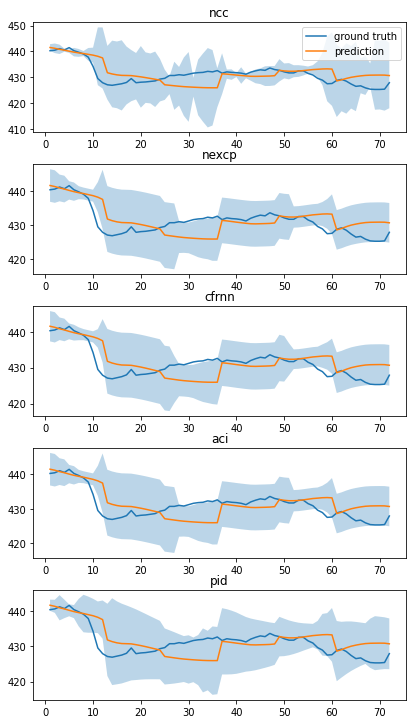

In [5]:
# predictions and prediction intervals
region = 'X'
week_ahead = 1
prediction_intervals_plot(all_preds, region, week_ahead)

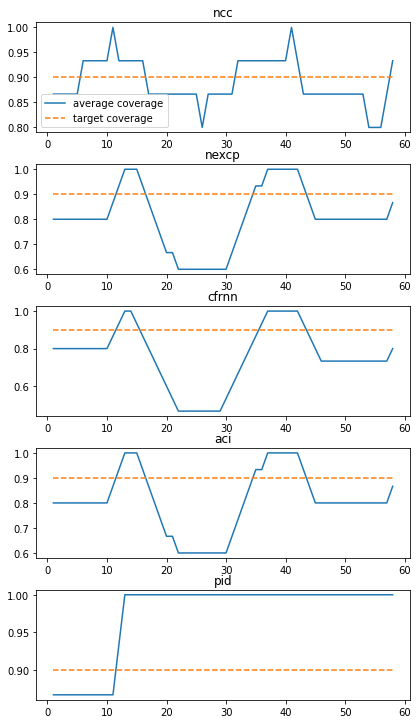

In [6]:
# running coverage
running_coverage_plot(all_preds, region, week_ahead)

<Figure size 432x288 with 0 Axes>

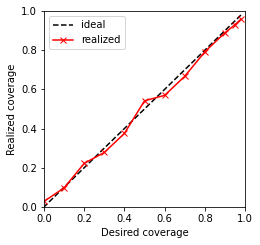

<Figure size 432x288 with 0 Axes>

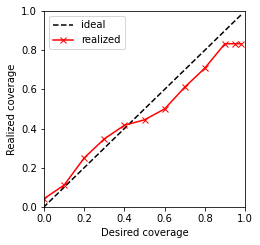

<Figure size 432x288 with 0 Axes>

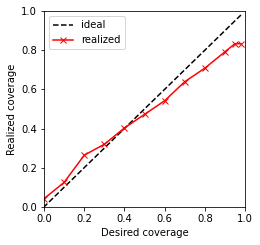

<Figure size 432x288 with 0 Axes>

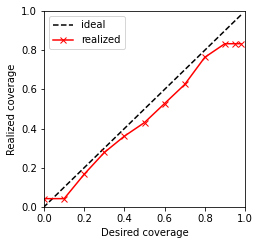

<Figure size 432x288 with 0 Axes>

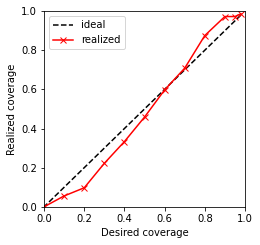

In [7]:
# calibration plot
for method in methods:
    cs_curve(1, 'X', all_preds[method], sorting=False)